## T-test

In [1]:
# Imports
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# Read csv file, only import column corresponding to home values
csvpath = os.path.join('Resources', 'housing_data.csv')
housing_data = pd.read_csv(csvpath, header=None,
                           usecols=[13], names=['Home Value'])
housing_data.head()

,Home Value
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [3]:
# Create samples with high values, mid values and low values
sample_size = 25
home_values = housing_data['Home Value']

low_limit, high_limit = home_values.quantile([0.33, 0.66])

high_prices = housing_data.loc[home_values > high_limit, 'Home Value']
medium_prices = housing_data.loc[(low_limit < home_values) &
                                 (home_values < high_limit),
                                 'Home Value']
low_prices = housing_data.loc[low_limit > home_values, 'Home Value']

samples = {'Sample 1': np.random.choice(high_prices, sample_size),
           'Sample 2': np.random.choice(medium_prices, sample_size),
           'Sample 3': np.random.choice(low_prices, sample_size)}

# Create a DataFrame from dictionary of samples
samples_df = pd.DataFrame(samples)
samples_df.head()

,Sample 1,Sample 2,Sample 3
0,25.2,20.8,6.3
1,24.0,22.6,8.8
2,30.1,20.6,15.6
3,50.0,19.3,13.4
4,31.7,22.6,14.6


In [4]:
# Calculate the means

means = samples_df.mean()
means

Sample 1    30.404
Sample 2    21.276
Sample 3    14.568
dtype: float64

In [5]:
# Calculate the standard errors

standard_errors = samples_df.sem()
standard_errors

Sample 1    1.544339
Sample 2    0.242850
Sample 3    0.633107
dtype: float64

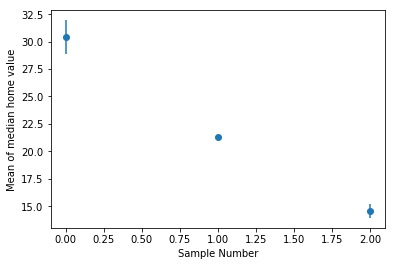

In [6]:
# Plot the means and the standard errors
x_values = np.arange(3)
plt.errorbar(x_values, means, standard_errors, fmt='o')

plt.xlabel("Sample Number")
plt.ylabel("Mean of median home value")

plt.show()

In [7]:
# Perform t-test to find out if the differences between two samples
# are are due to chance and therefore if the two samples represent the
# same underlying population.

# The t score is a ratio between the difference between two samples
# and the difference within the samples.

# p-value is the probability that the differences occurred by chance.

# equal_var must be False with samples that have different variances
tscore, pvalue = stats.ttest_ind(samples_df['Sample 1'],
                                 samples_df['Sample 3'],
                                 equal_var=False)
print('t-score: ', tscore)
print('p-value: ', pvalue)

t-score:  9.48789798377
p-value:  8.47327777648e-11


In [8]:
# If we now select two random samples
sample1 = np.random.choice(home_values, sample_size)
sample2 = np.random.choice(home_values, sample_size)

tscore, pvalue = stats.ttest_ind(sample1, sample2, equal_var=False)
print('t-score: ', tscore)
print('p-value: ', pvalue)

t-score:  -1.68306786197
p-value:  0.102121348885
